<a href="https://colab.research.google.com/github/PeteH-89/GEOG5003M_Portfolio/blob/main/GEOG5003M_Portfolio_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5003M Portfolio assignment

Student ID number: 201790833



## Block One Submission
Using data introduced in the course create a visualisation showing the association between two variables. Using skills developed in the practical exercises take any steps required to clean or pre-process the data.  It is expected that you wills change the default appearance of the markers and include an appropriate title and axis labels. Further marks will be awarded for appropriate use of colour pallets, inclusion of additional categorical variables in the visualisation and other steps taken to ensure effective data visualisation.

Ensure all the code has detailed comments.

Write a brief paragraph in markdown (max. 300 words) detailing the visualisation choices made given the types of data you have chosen.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
#set warnings to ignore
warnings.filterwarnings("ignore")

In [ ]:
# Data-preprocessing
oa=pd.read_csv('/content/drive/MyDrive/OA_GEOG990M_data.csv')
#subset for only data within north northamptonshire
northamptonshire=(oa.loc[(oa['SUB_REGION']=='Kettering')|(oa['SUB_REGION']=='Corby')|(oa['SUB_REGION']=='East Northamptonshire')|(oa['SUB_REGION']=='Wellingborough')])
#use .info() to see the dataset
#northamptonshire.info()
#column names are pretty unwieldy, they could be tidied up a bit
northamptonshire.columns = ['id', 'oaCode', 'pop', 'males', 'females', 'output_area', 'vulnerability', 'vulnerability_cluster', 'oa_code', 'subregion', 'region', 'total_residents', 'sup_grp_code', 'grp_code', 'sub_grp_code',
                        'sup_grp_name', 'grp_name', 'sub_grp_name', 'merge', 'ea_pct', 'ea_employed', 'ea_unemployed', 'ea_student', 'ei_pct', 'ei_retired', 'ei_student', 'ei_home_fam', 'ei_disabled', 'ei_other', 'oa_2011']
#drop the duplicated population column, region and 2011 output area is unncessary here also.
northants=pd.DataFrame(northamptonshire).drop(columns=['total_residents','region','oa_2011'])
#check for null data
#northants.isna().sum()
#create list of ei categories, change to integer
ei_cat=['ei_retired', 'ei_student', 'ei_home_fam', 'ei_disabled', 'ei_other']
northants[ei_cat]=northants[ei_cat].astype(int)
#we want to see the variations in economic activity type by former district/borough. as there are significant differences in populations it is better to check the rate rather than the raw quantities
#create a dataframe that has the pct of each EI category for each oa
eiraw=northants[['oaCode', 'pop', 'subregion', 'ei_pct', 'ei_retired', 'ei_student', 'ei_home_fam', 'ei_disabled', 'ei_other']]
eiraw=pd.DataFrame(eiraw)
#insert new columns into dataframe for the pct of each ei type
for category in ei_cat:
    pct_col_name='pct_'+category.split('_')[1]
    eiraw[pct_col_name]=(eiraw[category]/eiraw['pop'])*100
#eiraw.info()
#now pivot them so that we can visualise multiple varialbles in one
cat_pct=['pct_retired', 'pct_student', 'pct_home', 'pct_disabled', 'pct_other']
eifinal=pd.DataFrame(eiraw.melt(id_vars=['subregion', 'oaCode'], value_vars=cat_pct, var_name='ei_type', value_name='pct'))

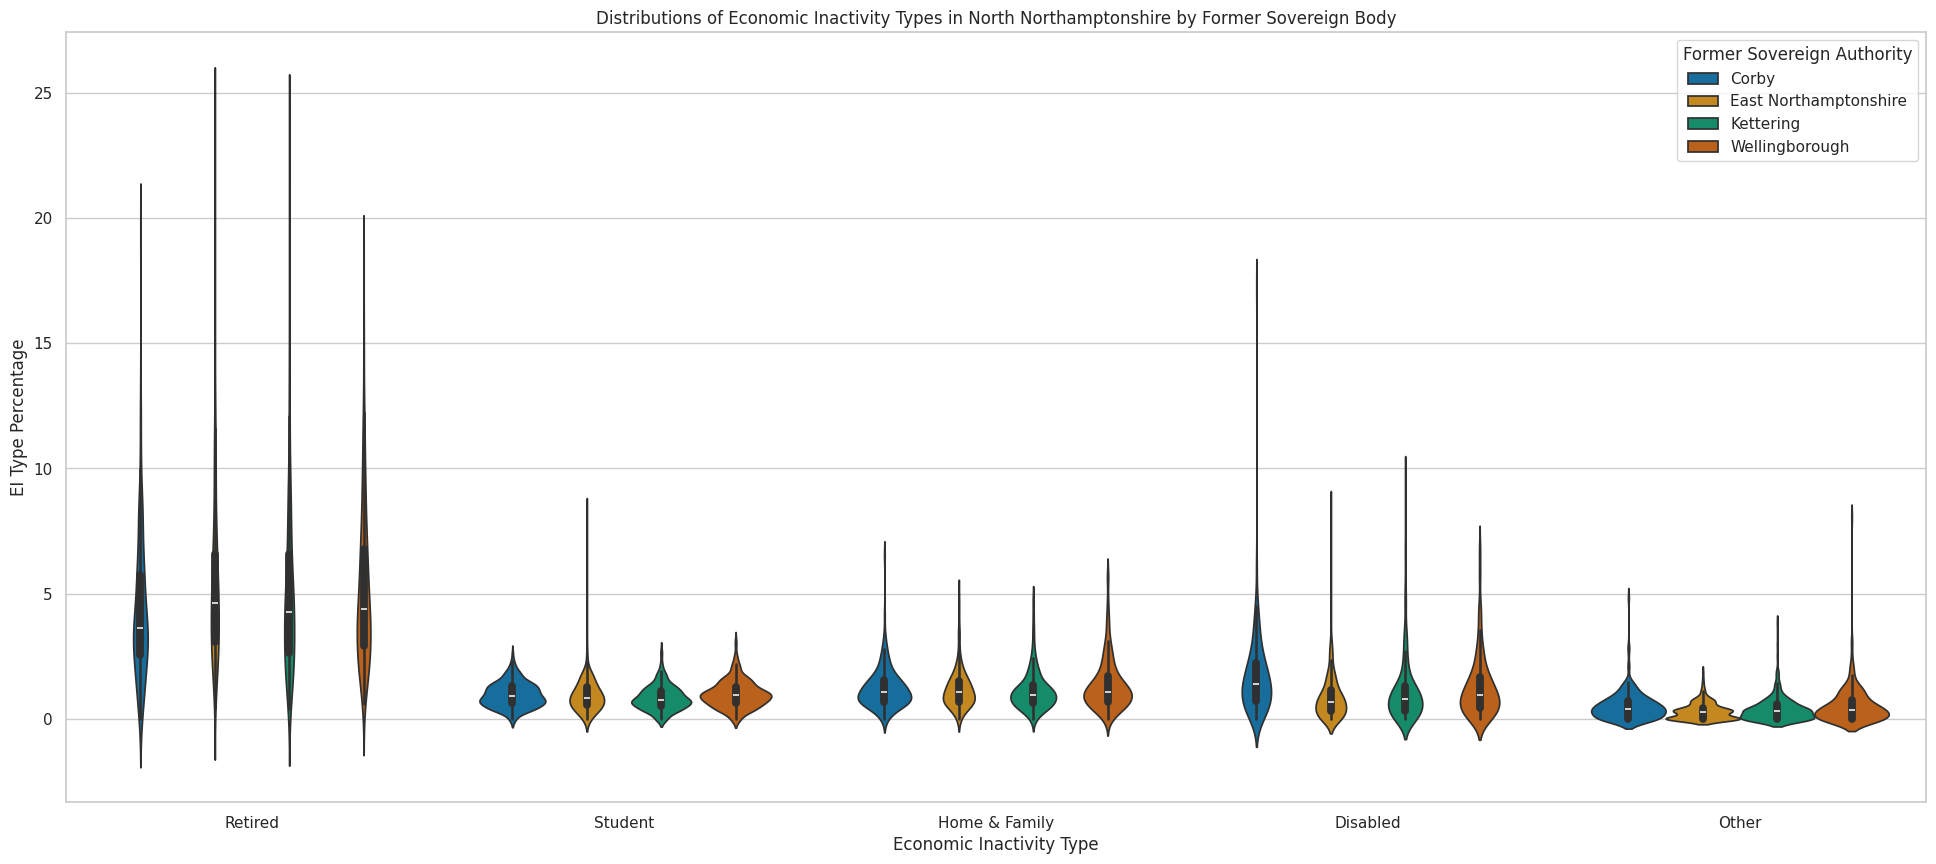

In [58]:
# Data Visualisation
#set figure size as default chart not wide enough, set sns theme
sns.set(rc={"figure.figsize":(24,10)})
sns.set_style('whitegrid')
#create violin plot
ax=sns.violinplot(data=eifinal, x='ei_type', y='pct', hue='subregion', palette='colorblind')
#define chart elements
#set type order for X Axis Ticks
type_order=['Retired', 'Student', 'Home & Family', 'Disabled', 'Other']
ax.set_xticklabels(type_order)
ax.legend(title="Former Sovereign Authority")
ax.set(title='Distributions of Economic Inactivity Types in North Northamptonshire by Former Sovereign Body',
       xlabel='Economic Inactivity Type',
       ylabel='EI Type Percentage');

### Block One Submission
Edit this celll to include a brief paragraph (max. 300 words) detailing the visualisation choices made given the types of data you have chosen.











    

## Block Two Submission:

Using the course notebooks and lectures as a guide create a static visualisation showing the spatial distribution of a variable of your choice. The type of spatial visualisation chosen should be suitable for the data chosen and appropriate data cleaning and pre-processing steps undertaken. Using skills demonstrated in the python notebooks change the default appearance of the visualisation of choice. Include an appropriate title and legend labels. Further marks will be awarded for appropriate use of colour pallets and other customisations to aid interpretation and improve accessibility. Write a brief paragraph in markdown (max 300 words) detailing the visual design choices made.

In [56]:
# import any further required packages
import geopandas as gpd
import pyproj
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow

In [65]:
# Data-preprocessing
#looking at the violin plot it looks as though the most common type of economic inactivity across all areas is retired
#as we're mapping the most common ei type for each oa we're likely to just get 'retired' on the whole map.
#need to filter the dataset so 'retired' doesn't show up and then return the max for each oa
ei_noret=eiraw.drop(columns=['pct_retired','ei_retired','ei_student','ei_home_fam','ei_disabled','ei_other'])
#create dataframe that has columns for each

<class 'pandas.core.frame.DataFrame'>
Index: 1017 entries, 133373 to 167224
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   oaCode        1017 non-null   object 
 1   pop           1017 non-null   int64  
 2   subregion     1017 non-null   object 
 3   ei_pct        1017 non-null   float64
 4   pct_student   1017 non-null   float64
 5   pct_home      1017 non-null   float64
 6   pct_disabled  1017 non-null   float64
 7   pct_other     1017 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 71.5+ KB


In [ ]:
# Data Visualisation

### Block Two Submission
Edit this celll to include a brief paragraph (max. 300 words) detailing the spatial data visualisation choices made given the types of data you have chosen.







## Acknowledgements

The use of Gen AI must be acknowledged in an ‘Acknowledgements’ section of any piece of academic work where it has been used as a functional tool to assist in the process of creating academic work.
If it is suspected that you have used a Gen AI tool to produce part of your work, but you have not acknowledged this use, this could be investigated under the Academic Misconduct procedure.
The minimum requirement to include in acknowledgement:
- Name and version of the generative AI system used eg ChatGPT-4.0
- Publisher (company that made the AI system) eg OpenAI
- URL of the AI system
- Brief description (single sentence) of context in which the tool was used.

For example: “I acknowledge the use of ChatGPT-3.5 (Open AI, https://chat.openai.com/) to support development of code to generate legend headings and support formatting of figures”
In the code state:  Prompt: write some python code using the Geopandas package to add a legend title for a colour bar”

For example: “I acknowledge the use of Co-pilot (Microsoft https://chat.openai.com/ Accessed 2025-4-03) to support debugging errors as identified in the code, Prompt: Help debug this error {ERROR MESSAGE} genrated while using the geopandas package”